In [9]:
import pandas as pd
import requests
import json
import gmaps
from config import gkey
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

def coordinates(loc):
    params = {"address": loc, "key":gkey}
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params = params)
    place_geo = response.json()
    lat = place_geo['results'][0]["geometry"]['location']['lat']
    lng = place_geo['results'][0]["geometry"]['location']['lng']
    return lat, lng
def f(x):
    return np.int(x)
f2 = np.vectorize(f)

In [ ]:
#looking at Agency Reporting

In [10]:
state_report = pd.read_excel('table12_clean.xls')
state_report = state_report[state_report['Participating state/Federal'] != 'Total']
state_report.head()

,Participating state/Federal,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
1,Alabama,98,1865517,0,0
2,Alaska,32,733747,4,7
3,Arizona,102,7135285,19,166
4,Arkansas,286,2874960,9,13
5,California,736,39520441,220,1063


In [11]:
#Runs through rows to get Coordinates for states to run gmap figures
state_report["Lat"] = ""
state_report["Lng"] = ""
for i,r in state_report.iterrows():
    st =  r[0]
    lat,lng = coordinates(st)
    state_report.loc[i,["Lat"]] = lat
    state_report.loc[i,["Lng"]] = lng

state_reportloc = state_report.loc[:,['Lat', 'Lng']]

In [12]:
#Merges Coords df with main df
state_report_complete = pd.merge(
    state_report, state_reportloc, how='left')
state_report_complete = state_report_complete[['Participating state/Federal','Lat','Lng',
                                               'Number of participating agencies',
                                               'Population covered',
                                               'Agencies submitting incident reports',
                                               'Total number of incidents reported']]
state_report_complete = state_report_complete.dropna()
state_report_complete

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
0,Alabama,32.3182,-86.9023,98,1865517,0,0
1,Alaska,64.2008,-149.494,32,733747,4,7
2,Arizona,34.0489,-111.094,102,7135285,19,166
3,Arkansas,35.2011,-91.8318,286,2874960,9,13
4,California,36.7783,-119.418,736,39520441,220,1063
5,Colorado,39.5501,-105.782,217,5512017,37,121
6,Connecticut,41.6032,-73.0877,97,3150064,34,81
7,Delaware,38.9108,-75.5277,63,962453,10,16
8,District of Columbia,38.9072,-77.0369,2,702455,2,213
9,Florida,27.6648,-81.5158,651,20922562,54,141


In [13]:
#removes FBI office as it covers a population of 0
state_report_complete = state_report_complete[state_report_complete['Population covered'] > 0]

In [14]:
#Describe table helps us find the max so we can carry out our figures efficiently
state_report_complete.describe()

,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
count,51.000000,5.100000e+01,51.000000,51.000000
mean,313.705882,6.017144e+06,38.941176,138.000000
std,287.565665,7.307204e+06,49.385590,198.989748
min,1.000000,5.528180e+05,0.000000,0.000000
25%,107.000000,1.456095e+06,9.000000,20.000000
50%,222.000000,3.528527e+06,20.000000,52.000000
75%,452.500000,7.307322e+06,47.000000,142.000000
max,1480.000000,3.952044e+07,220.000000,1063.000000


In [15]:
#creates a column of the report rate showing the number of incidents reported by the population covered
incidents_reported_ratio = state_report_complete['Report Rate'] = 1000000 * \
                            state_report_complete['Total number of incidents reported'].astype(
                            int) / state_report_complete['Population covered'].astype(int)
state_report_complete.head()
#creates a column of the agencies per population 
agencies_per_pop = state_report_complete['Agencies Per Pop'] = 1000000 * \
                            state_report_complete['Number of participating agencies'].astype(
                            int) / state_report_complete['Population covered'].astype(int)
agencies_per_pop.describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


count     51.000000
mean      67.966091
std       40.122666
min        1.018310
25%       41.362175
50%       57.418975
75%       96.222788
max      161.182334
dtype: float64

In [16]:
gmaps.configure(api_key=gkey)

In [17]:
locations = state_report_complete[["Lat", "Lng"]].astype(float)
report_rate = state_report_complete['Report Rate'].astype(float)
pop_covered = state_report_complete['Agencies Per Pop'].astype(float)

#agencies per pop heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=pop_covered, 
                                 dissipating=False, max_intensity=170,
                                 point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#incidents reported ratio heat map
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=report_rate, 
                                 dissipating=False, max_intensity=25,
                                 point_radius = 1.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
state_report_complete.head()

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported,Report Rate,Agencies Per Pop
0,Alabama,32.3182,-86.9023,98,1865517,0,0,0.000000,52.532354
1,Alaska,64.2008,-149.494,32,733747,4,7,9.540073,43.611763
2,Arizona,34.0489,-111.094,102,7135285,19,166,23.264663,14.295154
3,Arkansas,35.2011,-91.8318,286,2874960,9,13,4.521802,99.479645
4,California,36.7783,-119.418,736,39520441,220,1063,26.897473,18.623274


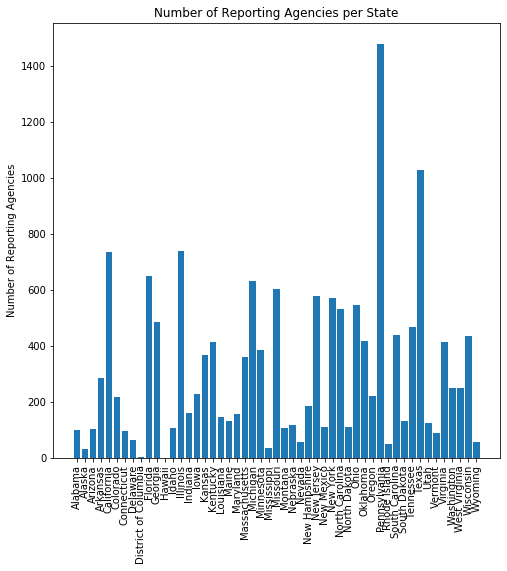

<Figure size 1440x720 with 0 Axes>

In [63]:
#plotting the Number of Reporting Agencies per State
plt.figure(figsize=(8,8))

d1 = plt.bar(state_report_complete['Participating state/Federal'],state_report_complete['Number of participating agencies'] )
plt.xticks(state_report_complete['Participating state/Federal'], rotation=90)
plt.title('Number of Reporting Agencies per State')
plt.ylabel('Number of Reporting Agencies')
plt.show()
plt.tight_layout()
#plt.savefig('Number_of_reporting_agencies_per_state.png')

In [21]:
#now looking at percent of population by agencies 

In [22]:
percent_pop = pd.read_csv('PercentPopulation.csv')

In [69]:
percent_pop.head()

,Unnamed: 0,State,PerPop
0,23,Mississippi,1.653527
1,9,Georgia,5.349316
2,47,West Virginia,9.582331
3,14,Iowa,9.792788
4,17,Louisiana,9.980903


In [70]:
state_report_complete['State'] = state_report_complete['Participating state/Federal']

In [71]:
state_report_complete.head()

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported,Report Rate,Agencies Per Pop,State,Unnamed: 0_x,PerPop_x,Unnamed: 0_y,PerPop_y,Unnamed: 0,PerPop
0,Alabama,32.3182,-86.9023,98,1865517,0,0,0.000000,52.532354,Alabama,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,64.2008,-149.494,32,733747,4,7,9.540073,43.611763,Alaska,0.0,48.586896,0.0,48.586896,0.0,48.586896
2,Arizona,34.0489,-111.094,102,7135285,19,166,23.264663,14.295154,Arizona,1.0,61.543787,1.0,61.543787,1.0,61.543787
3,Arkansas,35.2011,-91.8318,286,2874960,9,13,4.521802,99.479645,Arkansas,2.0,11.445993,2.0,11.445993,2.0,11.445993
4,California,36.7783,-119.418,736,39520441,220,1063,26.897473,18.623274,California,3.0,63.328987,3.0,63.328987,3.0,63.328987


In [68]:
state_report_complete = pd.merge(state_report_complete, percent_pop, how= 'left', on = ['State' , 'State'])
state_report_complete

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported,Report Rate,Agencies Per Pop,State,Unnamed: 0_x,PerPop_x,Unnamed: 0_y,PerPop_y,Unnamed: 0,PerPop
0,Alabama,32.3182,-86.9023,98,1865517,0,0,0.000000,52.532354,Alabama,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,64.2008,-149.494,32,733747,4,7,9.540073,43.611763,Alaska,0.0,48.586896,0.0,48.586896,0.0,48.586896
2,Arizona,34.0489,-111.094,102,7135285,19,166,23.264663,14.295154,Arizona,1.0,61.543787,1.0,61.543787,1.0,61.543787
3,Arkansas,35.2011,-91.8318,286,2874960,9,13,4.521802,99.479645,Arkansas,2.0,11.445993,2.0,11.445993,2.0,11.445993
4,California,36.7783,-119.418,736,39520441,220,1063,26.897473,18.623274,California,3.0,63.328987,3.0,63.328987,3.0,63.328987
5,Colorado,39.5501,-105.782,217,5512017,37,121,21.952037,39.368529,Colorado,4.0,43.356552,4.0,43.356552,4.0,43.356552
6,Connecticut,41.6032,-73.0877,97,3150064,34,81,25.713763,30.793025,Connecticut,5.0,36.495980,5.0,36.495980,5.0,36.495980
7,Delaware,38.9108,-75.5277,63,962453,10,16,16.624188,65.457742,Delaware,6.0,19.215372,6.0,19.215372,6.0,19.215372
8,District of Columbia,38.9072,-77.0369,2,702455,2,213,303.222270,2.847157,District of Columbia,7.0,102.623382,7.0,102.623382,7.0,102.623382
9,Florida,27.6648,-81.5158,651,20922562,54,141,6.739136,31.114736,Florida,8.0,21.088502,8.0,21.088502,8.0,21.088502


In [27]:
#shows a heat map of the percent of the agencies per population covered
locations = state_report_complete[["Lat", "Lng"]].astype(float)
perpop = state_report_complete['PerPop']
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=perpop, 
                                 dissipating=False, max_intensity=75,
                                 point_radius = 1.5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
#### now looking at Bias Motivation by Location

In [29]:
bias_location = pd.read_excel('table10_clean.xls')

In [30]:
bias_location = bias_location[bias_location['Location'] != 'Total']
bias_location

,Location,Total incidents,Race/Ethnicity/Ancestry,Religion,Sexual orientation,Disability,Gender,Gender Identity,Multiple Bias Incidents
1,Abandoned/condemned structure,4,3,1,0,0,0,0,0
2,Air/bus/train terminal,113,67,2,34,1,1,6,2
3,Amusement park,3,2,0,0,0,0,1,0
4,Arena/stadium/fairgrounds/coliseum,7,2,1,3,0,0,1,0
5,ATM separate from bank,2,1,0,0,0,0,1,0
6,Auto dealership new/used,8,5,1,2,0,0,0,0
7,Bank/savings and loan,28,14,8,2,3,0,1,0
8,Bar/nightclub,119,53,3,59,1,0,2,1
9,Camp/campground,4,4,0,0,0,0,0,0
10,Church/synagogue/temple/mosque,263,29,219,12,0,0,0,3


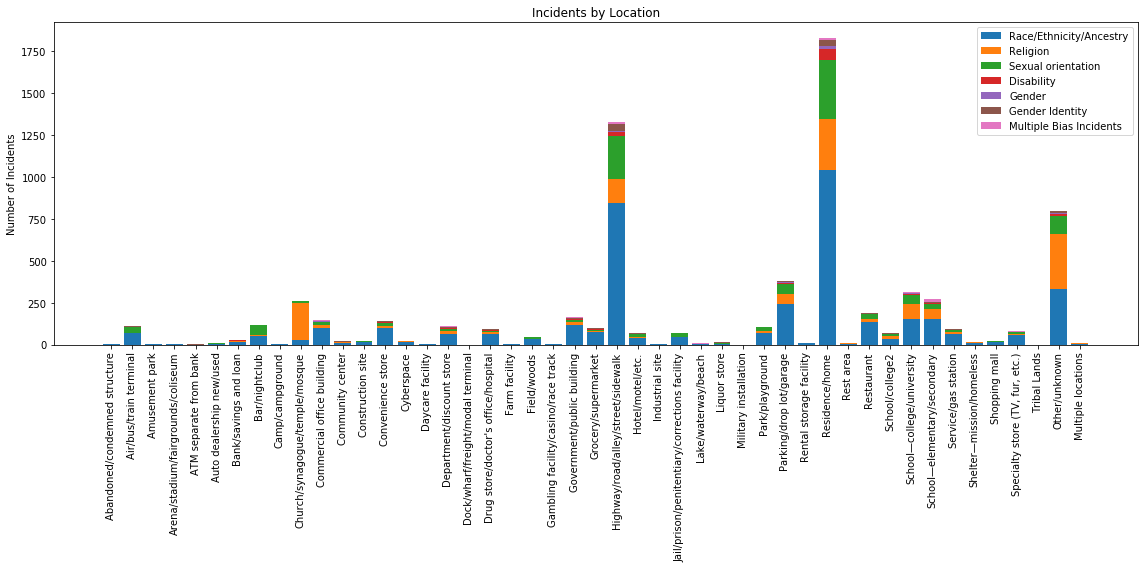

In [77]:
#plotting the Number of Incidents(by type) by Location
plt.figure(figsize=(16,8))

p1 = plt.bar(bias_location['Location'], f2(bias_location['Race/Ethnicity/Ancestry']))
p2 = plt.bar(bias_location['Location'], f2(bias_location['Religion']), bottom = f2(bias_location['Race/Ethnicity/Ancestry']))
p3 = plt.bar(bias_location['Location'], f2(bias_location['Sexual orientation']), bottom = f2(bias_location['Religion'])+ f2(bias_location['Race/Ethnicity/Ancestry']))
p4 = plt.bar(bias_location['Location'], f2(bias_location['Disability']),bottom = f2(bias_location['Sexual orientation'])+f2(bias_location['Religion'])+ f2(bias_location['Race/Ethnicity/Ancestry']))
p5 = plt.bar(bias_location['Location'], f2(bias_location['Gender']),bottom =f2(bias_location['Disability'])+ f2(bias_location['Sexual orientation'])+f2(bias_location['Religion'])+ f2(bias_location['Race/Ethnicity/Ancestry']))
p6 = plt.bar(bias_location['Location'], f2(bias_location['Gender Identity']),bottom =f2(bias_location['Gender']) +f2(bias_location['Disability'])+ f2(bias_location['Sexual orientation'])+f2(bias_location['Religion'])+ f2(bias_location['Race/Ethnicity/Ancestry']))
p7 = plt.bar(bias_location['Location'], f2(bias_location['Multiple Bias Incidents']),bottom =f2(bias_location['Gender Identity'])+f2(bias_location['Gender']) +f2(bias_location['Disability'])+ f2(bias_location['Sexual orientation'])+f2(bias_location['Religion'])+ f2(bias_location['Race/Ethnicity/Ancestry']))

plt.title('Incidents by Location')
plt.ylabel('Number of Incidents')
plt.xticks(bias_location['Location'], rotation=90)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0],p6[0], p7[0]), ('Race/Ethnicity/Ancestry', 'Religion','Sexual orientation', 'Disability', 'Gender', 'Gender Identity','Multiple Bias Incidents' ), prop={'size': 10})

#plt.rcParams['figure.figsize'] = (20, 3)
plt.tight_layout()
#plt.savefig('Incidents_by_Bias_Motivation_by_Location')
plt.show()

In [78]:
### NOW LOOKING AT NUMBER OF INCIDENTS BY STATE###

In [79]:
#naming the dfs based on their sheet from the excel file
crimes_persons = pd.read_excel('table11_clean.xls', sheet_name = 'crimes_persons')
crimes_property = pd.read_excel('table11_clean.xls', sheet_name = 'crimes_property')
crimes_society = pd.read_excel('table11_clean.xls', sheet_name = 'crimes_society')

In [80]:
#cleaning the rows
crimes_persons = crimes_persons[crimes_persons['Participating state/Federal'] != 'Total']
crimes_persons = crimes_persons[crimes_persons['Participating state/Federal'] != 'Federal Bureau of Investigation, Field Offices']

In [81]:
crimes_property = crimes_property[crimes_property['Participating state/Federal'] != 'Total']
crimes_property = crimes_property[crimes_property['Participating state/Federal'] != 'Federal Bureau of Investigation, Field Offices']

In [82]:
crimes_society = crimes_society[crimes_society['Participating state/Federal'] != 'Federal Bureau of Investigation, Field Offices']
crimes_society = crimes_society[crimes_society['Participating state/Federal'] != 'Total']

In [83]:
#renaming the variabels for plotting
murder_bar = crimes_persons['Murder and nonnegligent manslaughter']
rape_bar = crimes_persons['Rape']
assualt_bar = crimes_persons['Aggravated assault']
simp_assualt_bar = crimes_persons['Simple assault']
initimidation_bar = crimes_persons['Intimidation']
other_bar  = crimes_persons['Other']

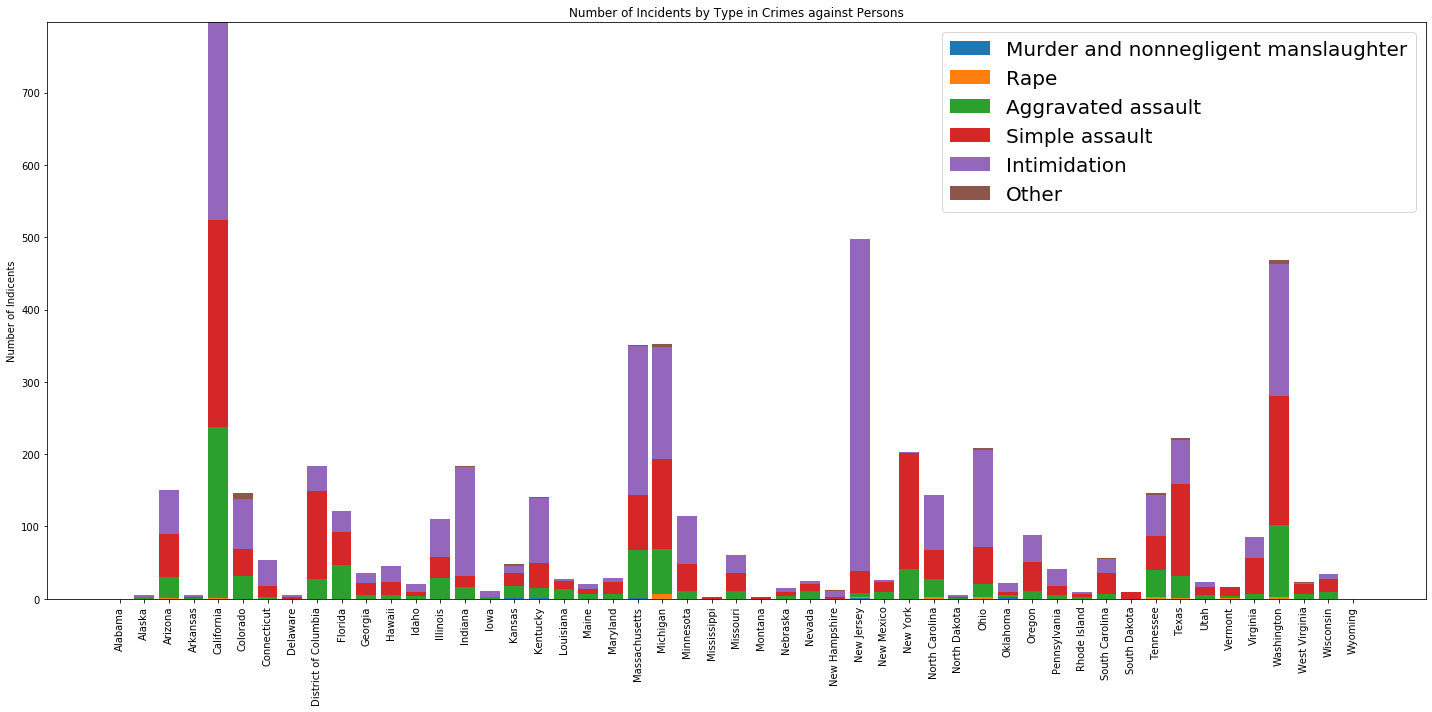

In [85]:
#crimes against persons bar chart
b1 = plt.bar(crimes_persons['Participating state/Federal'], f2(murder_bar))
b2 = plt.bar(crimes_persons['Participating state/Federal'], f2(rape_bar), bottom = f2(murder_bar))
b3 = plt.bar(crimes_persons['Participating state/Federal'], f2(assualt_bar), bottom = f2(murder_bar) + f2(rape_bar)) 
b4 = plt.bar(crimes_persons['Participating state/Federal'], f2(simp_assualt_bar), bottom = f2(murder_bar) + f2(rape_bar) + f2(assualt_bar))
b5 = plt.bar(crimes_persons['Participating state/Federal'], f2(initimidation_bar),  bottom = f2(murder_bar) + f2(rape_bar) + f2(assualt_bar) + f2(simp_assualt_bar))
b6 = plt.bar(crimes_persons['Participating state/Federal'], f2(other_bar),  bottom = f2(murder_bar) + f2(rape_bar) + f2(assualt_bar) + f2(simp_assualt_bar) + f2(initimidation_bar))

plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Type in Crimes against Persons')
plt.xticks(crimes_persons['Participating state/Federal'], rotation=90)
plt.legend((b1[0], b2[0], b3[0], b4[0], b5[0],b6[0]), ('Murder and nonnegligent manslaughter', 'Rape','Aggravated assault', 'Simple assault', 'Intimidation', 'Other'), prop={'size': 20})
plt.tight_layout()
#plt.savefig('incidents_type_persons.png')
plt.show()

In [ ]:
#moving on to criems against property 

In [41]:
#renaming the variabels for plotting
robbery_bar = crimes_property['Robbery']
burglary_bar = crimes_property['Burglary']
larceny_bar = crimes_property['Larceny/Theft']
motor_bar = crimes_property['Motor Vehicle Theft']
arson_bar = crimes_property['Arson']
destruction_bar = crimes_property['Destruction/damage/vandalism']
prop_other_bar = crimes_property['Other']

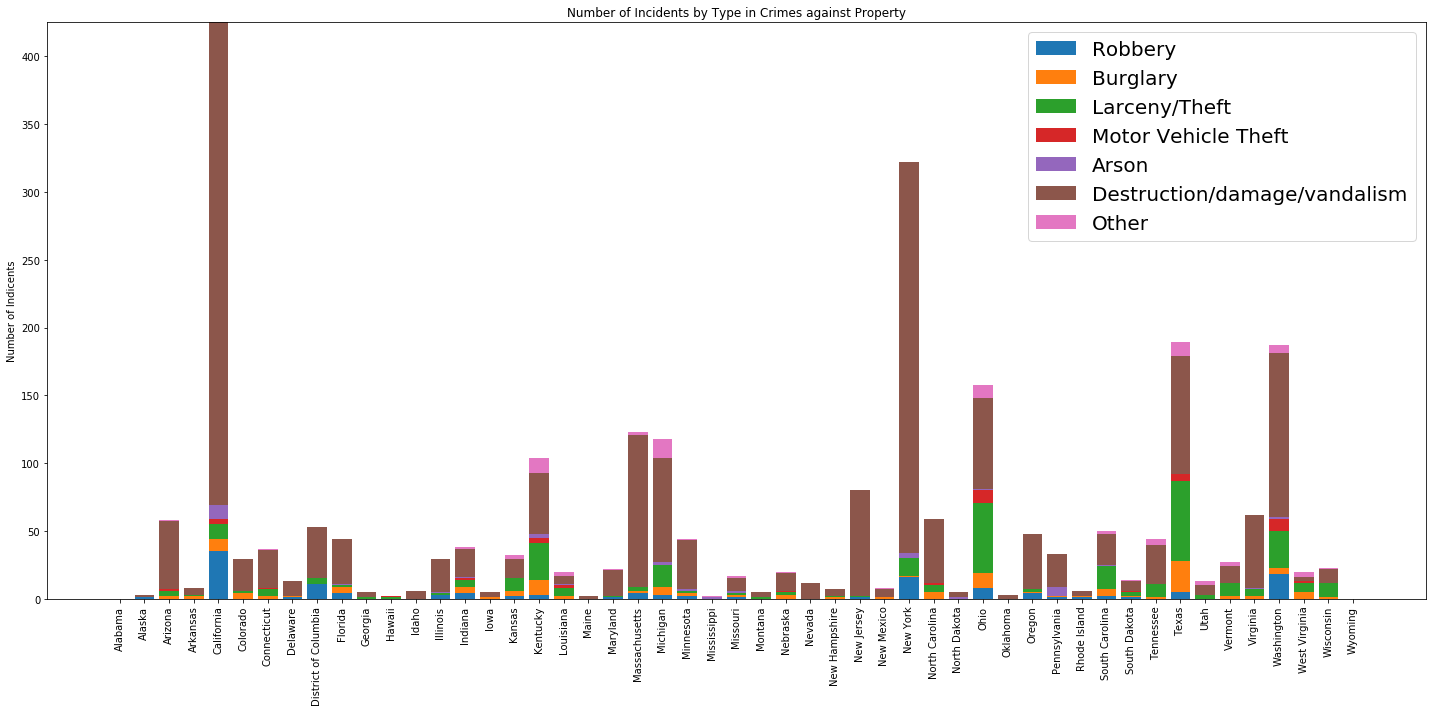

In [87]:
#Plotting the number of incidents in crimes against property 
m1 = plt.bar(crimes_property['Participating state/Federal'], f2(robbery_bar))
m2 = plt.bar(crimes_property['Participating state/Federal'], f2(burglary_bar), bottom = f2(robbery_bar))
m3 = plt.bar(crimes_property['Participating state/Federal'], f2(larceny_bar), bottom = f2(robbery_bar) + f2(burglary_bar))
m4 = plt.bar(crimes_property['Participating state/Federal'], f2(motor_bar), bottom = f2(robbery_bar) + f2(burglary_bar) + f2(larceny_bar))
m5 = plt.bar(crimes_property['Participating state/Federal'], f2(arson_bar), bottom = f2(robbery_bar) + f2(burglary_bar) + f2(larceny_bar) + f2(motor_bar))
m6 = plt.bar(crimes_property['Participating state/Federal'], f2(destruction_bar), bottom = f2(robbery_bar) + f2(burglary_bar) + f2(larceny_bar) + f2(motor_bar) + f2(arson_bar))
m7 = plt.bar(crimes_property['Participating state/Federal'], f2(prop_other_bar), bottom = f2(robbery_bar) + f2(burglary_bar) + f2(larceny_bar) + f2(motor_bar) + f2(arson_bar) + f2(destruction_bar))


plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Type in Crimes against Property')
plt.xticks(crimes_persons['Participating state/Federal'], rotation=90)
plt.legend((m1[0], m2[0], m3[0], m4[0], m5[0],m6[0], m7[0]), ('Robbery', 'Burglary','Larceny/Theft', 'Motor Vehicle Theft', 'Arson','Destruction/damage/vandalism', 'Other'), prop={'size': 20})
plt.tight_layout()
#plt.savefig('incidents_type_property.png')

In [88]:
#crimes against society

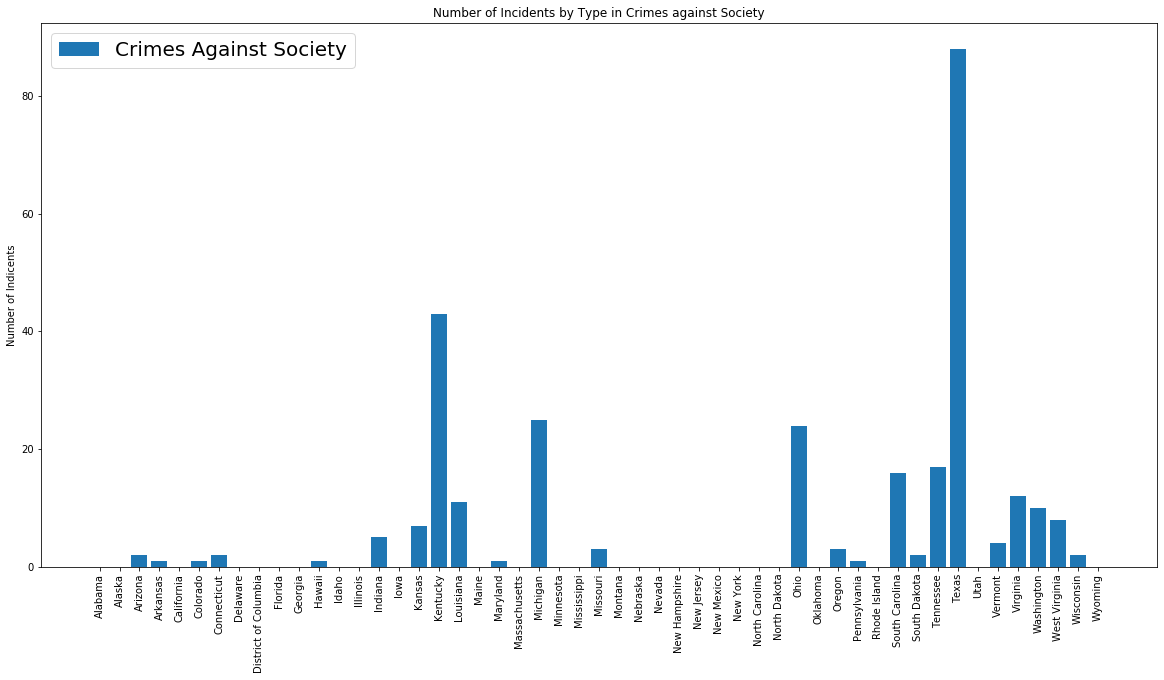

In [89]:
s1 = plt.bar(crimes_society['Participating state/Federal'], crimes_society['society'])
plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Type in Crimes against Society')
plt.rcParams['figure.figsize'] = (20, 10)
plt.xticks(crimes_persons['Participating state/Federal'], rotation=90)
plt.legend([s1[0]], ['Crimes Against Society'],prop={'size': 20})
#plt.savefig('incidents_type_society.png')
plt.show()

In [90]:
### NOW MOVING ON TO OFFENSE TYPE BY BIAS MOTIVATION

In [91]:
#renaming based off of the sheet the dfs are taken from
offense_bias_person = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_persons')
offense_bias_property = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_property')
offense_bias_society = pd.read_excel('table4_clean.xls', sheet_name = 'crimes_society')

In [92]:
#cleaning rows
offense_bias_property = offense_bias_property[offense_bias_property['Bias motivation']!='Total']
offense_bias_property = offense_bias_property[offense_bias_property['Bias motivation']!='Single-Bias Incidents']

offense_bias_property.head()

,Bias motivation,Robbery,Burglary,Larceny-theft,Motor vehicle theft,Arson,Destruction/damage/vandalism,Other
2,Race/Ethnicity/Ancestry:,68,76,195,26,16,854,50
3,Anti-White,15,24,79,8,1,91,20
4,Anti-Black or African American,14,24,22,3,10,474,3
5,Anti-American Indian or Alaska Native,2,8,49,9,1,14,12
6,Anti-Asian,4,2,5,0,0,30,2


In [52]:
#renaming for plotting
motivation_bar =offense_bias_property['Bias motivation']
bias_robbery_bar = offense_bias_property['Robbery']
bias_burglary_bar = offense_bias_property['Burglary']
bias_theft_bar = offense_bias_property['Larceny-theft']
bias_vehicle_bar = offense_bias_property['Motor vehicle theft']
bias_arson_bar = offense_bias_property['Arson']
bias_destruction_bar = offense_bias_property['Destruction/damage/vandalism']
bias_other_bar_prop = offense_bias_property['Other']

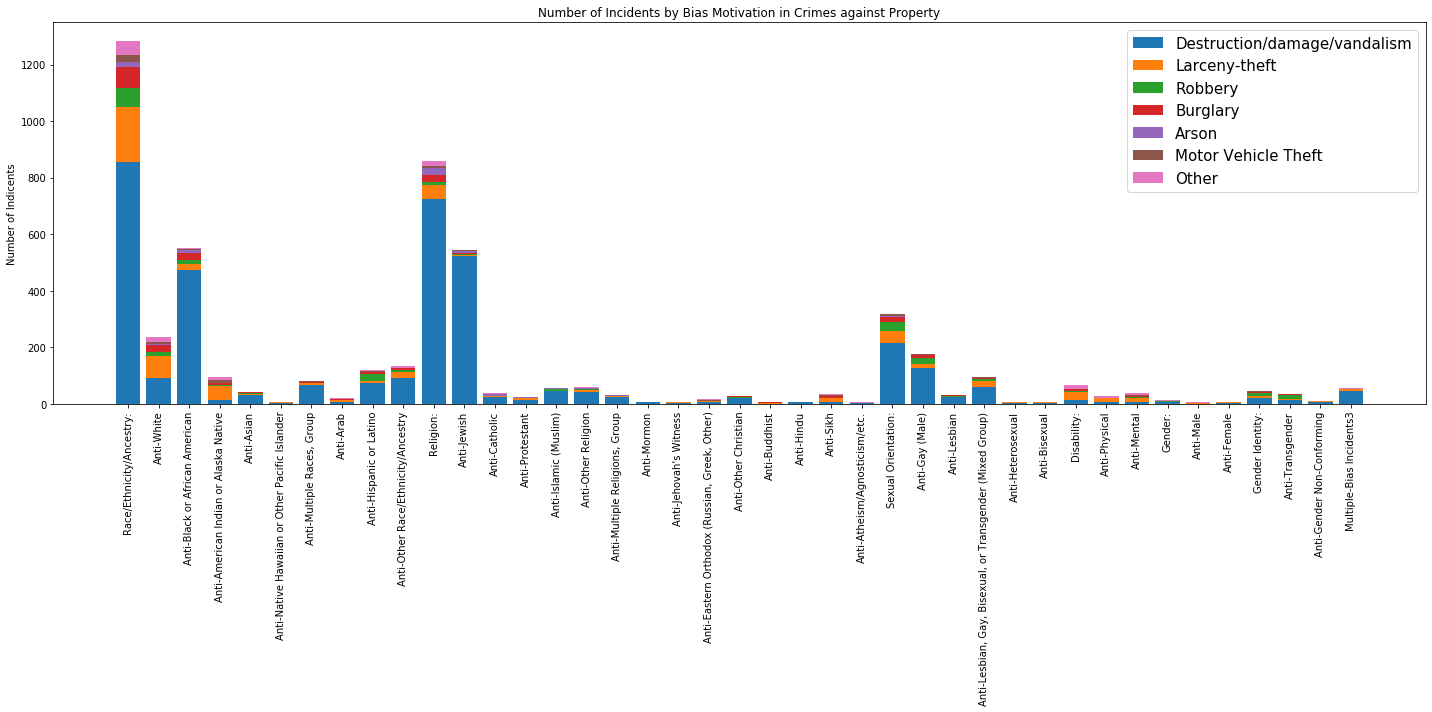

In [93]:
k1 = plt.bar(motivation_bar, f2(bias_destruction_bar))
k2 = plt.bar(motivation_bar, f2(bias_theft_bar), bottom = f2(bias_destruction_bar))
k3 = plt.bar(motivation_bar, f2(bias_robbery_bar), bottom = f2(bias_theft_bar)+f2(bias_destruction_bar))
k4 = plt.bar(motivation_bar, f2(bias_burglary_bar), bottom = f2(bias_robbery_bar)+f2(bias_theft_bar)+f2(bias_destruction_bar))
k5 = plt.bar(motivation_bar, f2(bias_arson_bar), bottom = f2(bias_burglary_bar)+f2(bias_robbery_bar)+f2(bias_theft_bar)+f2(bias_destruction_bar))
k6 = plt.bar(motivation_bar, f2(bias_vehicle_bar), bottom = f2(bias_arson_bar)+f2(bias_burglary_bar)+f2(bias_robbery_bar)+f2(bias_theft_bar)+f2(bias_destruction_bar))
k7 = plt.bar(motivation_bar, f2(bias_other_bar_prop), bottom = f2(bias_vehicle_bar)+f2(bias_arson_bar)+f2(bias_burglary_bar)+f2(bias_robbery_bar)+f2(bias_theft_bar)+f2(bias_destruction_bar))
plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Bias Motivation in Crimes against Property')
plt.legend((k1[0], k2[0], k3[0], k4[0], k5[0],k6[0], k7[0]), ('Destruction/damage/vandalism', 'Larceny-theft','Robbery', 'Burglary', 'Arson', 'Motor Vehicle Theft', 'Other'), prop={'size': 15})
plt.xticks(offense_bias_property['Bias motivation'], rotation=90)
plt.tight_layout()
#plt.savefig('incidents_bias_motivation_property.png')

In [94]:
#cleaning rows
offense_bias_person = offense_bias_person[offense_bias_person['Bias motivation']!='Total']
offense_bias_person = offense_bias_person[offense_bias_person['Bias motivation']!='Single-Bias Incidents']

offense_bias_person = offense_bias_person.dropna()
offense_bias_person.head()

,Bias motivation,Murder and nonnegligent manslaughter,Rape,Aggravated assault,Simple assault,Intimidation,Other
2,Race/Ethnicity/Ancestry:,8,9,659,1121.0,1627,21
3,Anti-White,3,6,114,250.0,289,9
4,Anti-Black or African American,4,2,323,486.0,908,2
5,Anti-American Indian or Alaska Native,0,0,6,30.0,11,5
6,Anti-Asian,0,0,18,46.0,60,0


In [55]:
#retyping a row that was a float into int
offense_bias_person['Simple assault'] = offense_bias_person['Simple assault'].astype(int)

In [95]:
motivation_bar_person = offense_bias_person['Bias motivation']
bias_murder_bar = offense_bias_person['Murder and nonnegligent manslaughter']
bias_rape_bar = offense_bias_person['Rape']
bias_agg_bar = offense_bias_person['Aggravated assault']
bias_simp_bar = offense_bias_person['Simple assault']
bias_intimidation_bar = offense_bias_person['Intimidation']
bias_other_bar_person = offense_bias_person['Other']

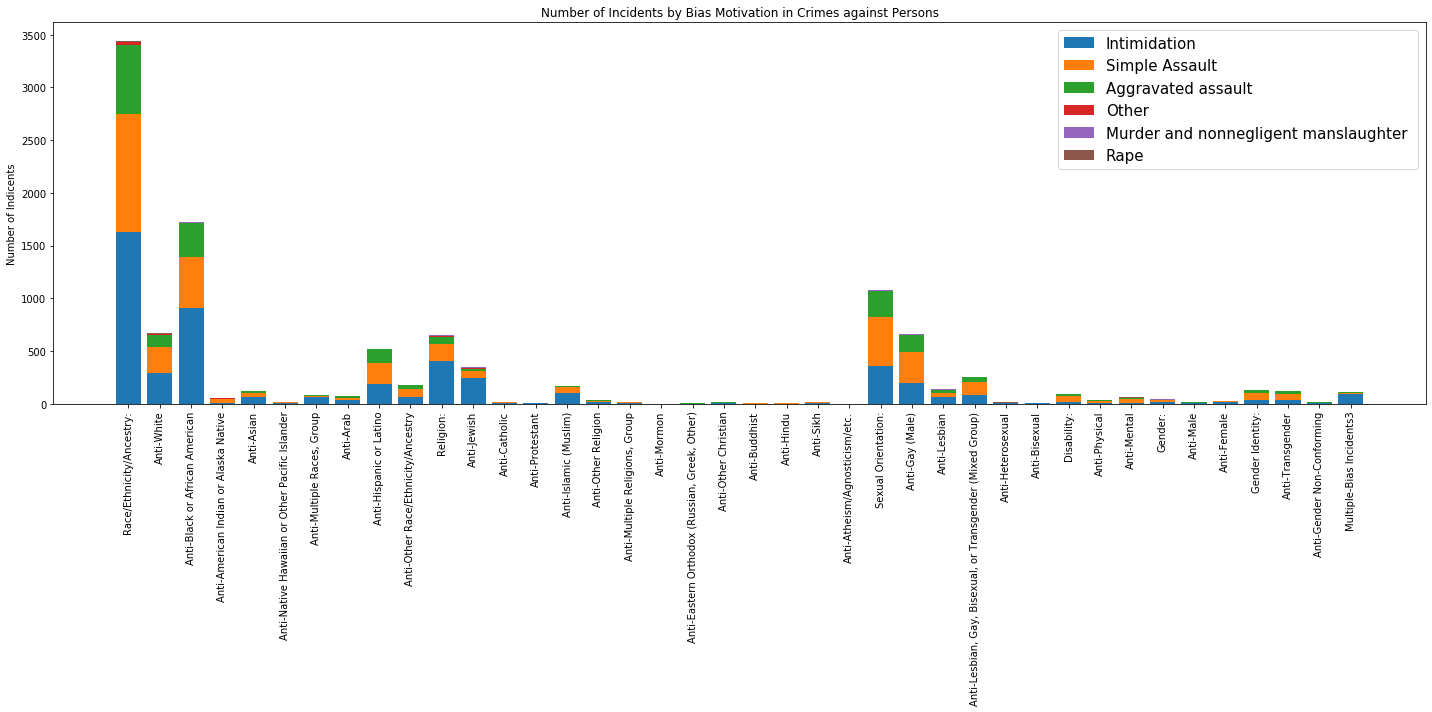

In [96]:
d1 = plt.bar(motivation_bar_person, f2(bias_intimidation_bar))
d2 = plt.bar(motivation_bar_person, f2(bias_simp_bar),bottom = f2(bias_intimidation_bar))
d3 = plt.bar(motivation_bar_person, f2(bias_agg_bar), bottom = f2(bias_simp_bar)+f2(bias_intimidation_bar))
d4 = plt.bar(motivation_bar_person, f2(bias_other_bar_person), bottom = f2(bias_agg_bar)+f2(bias_simp_bar)+f2(bias_intimidation_bar))
d5 = plt.bar(motivation_bar_person, f2(bias_murder_bar), bottom =f2(bias_other_bar_person)+ f2(bias_agg_bar)+f2(bias_simp_bar)+f2(bias_intimidation_bar))
d6 = plt.bar(motivation_bar_person, f2(bias_rape_bar), bottom =f2(bias_murder_bar)+f2(bias_other_bar_person)+ f2(bias_agg_bar)+f2(bias_simp_bar)+f2(bias_intimidation_bar))

plt.ylabel('Number of Indicents')
plt.title('Number of Incidents by Bias Motivation in Crimes against Persons')
plt.xticks(offense_bias_person['Bias motivation'], rotation=90)
plt.legend((d1[0], d2[0], d3[0], d4[0], d5[0],d6[0]), ('Intimidation', 'Simple Assault','Aggravated assault', 'Other', 'Murder and nonnegligent manslaughter ', 'Rape'), prop={'size': 15})
plt.tight_layout()
#plt.savefig('incidents_bias_motivation_persons.png')

In [97]:
#now crimes against society

In [98]:
offense_bias_society.head()
offense_bias_society = offense_bias_society[offense_bias_society['Bias motivation']!='Total']
offense_bias_society = offense_bias_society[offense_bias_society['Bias motivation']!='Single-Bias Incidents']

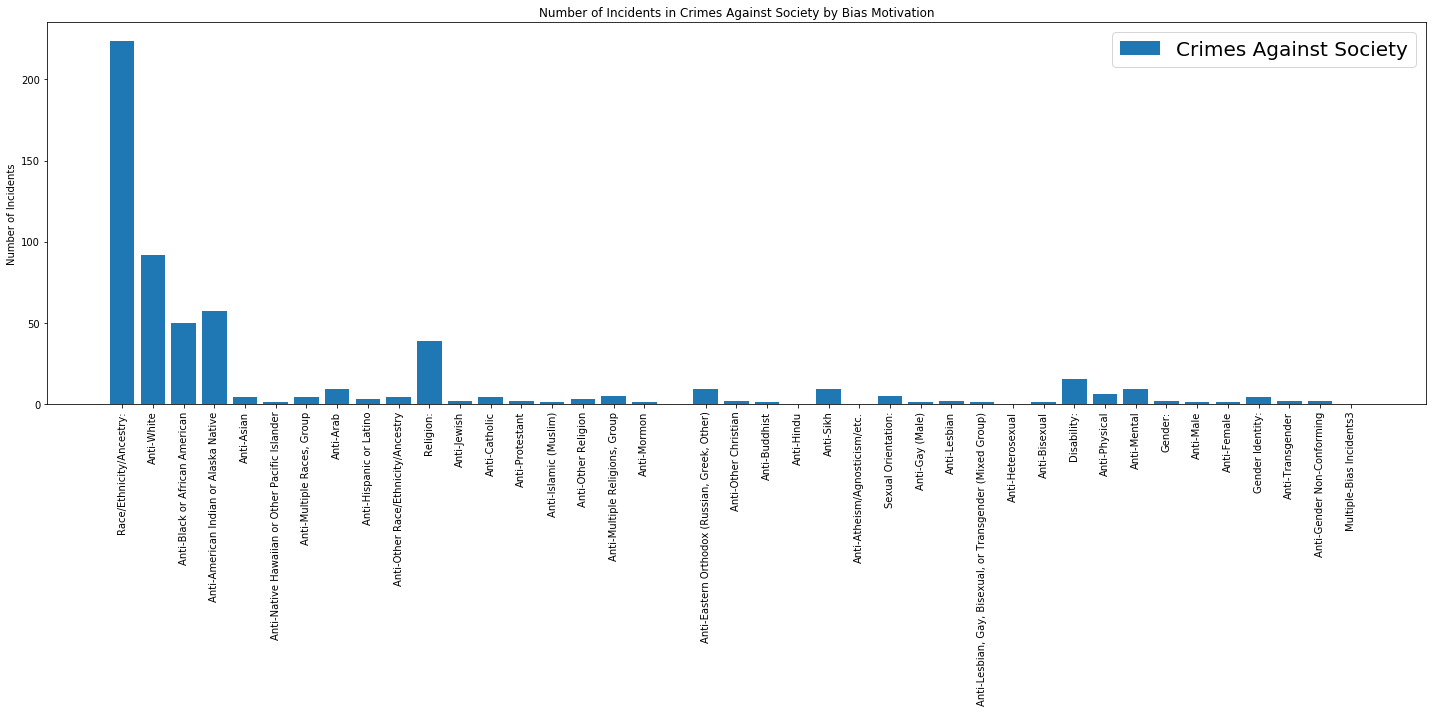

In [99]:
b1 = plt.bar(offense_bias_society['Bias motivation'], offense_bias_society['Crimes against society'])
plt.xticks(offense_bias_person['Bias motivation'], rotation=90)
plt.legend([b1[0]], ['Crimes Against Society'],prop={'size': 20})
plt.title('Number of Incidents in Crimes Against Society by Bias Motivation')
plt.ylabel('Number of Incidents')
plt.tight_layout()
#plt.savefig('incidents_bias_motivation_society.png')